# 1-D CoefficientFunctions (Unit 1.2)

In NGSolve, CoefficientFunctions are representations of functions defined on the computational domain $\Omega$. Examples are expressions of coordinate variables $x,y,z$ and functions that are constant on subdomains. Much of the magic behind the seamless integration of NGSolve with python lies in CoefficientFunctions. This tutorial introduces you to them.

In [3]:
import netgen.gui
%gui tk
from ngsolve import *
import ngsolve.internal as ngint
ngint.viewoptions.drawedges = 1
from mesh_util import uniform_1d_mesh

mesh = Mesh(uniform_1d_mesh())

#### Define a function

In [4]:
myfunc = x*(1-x)
myfunc

In [5]:
x        # This is a built-in CoefficientFunction

In [10]:
mip = mesh(0.6)
myfunc(mip)

0.24

### Notes
I don't know of any way to get Draw to work for 1-D

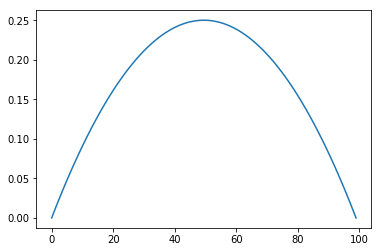

In [9]:
import matplotlib.pyplot as plt
from numpy import linspace
plt.plot([myfunc(mesh(x)) for x in linspace(0,1,100)])

#### Evaluate the function



Note that ```myfunc(0.2)``` does not work: You need to give points in the form of MappedIntegrationPoints like mip above. The mesh knows how to produce them.
#### Examining functions on sets of points



#### Interpolate a CoefficientFunction

We may Set a GridFunction using a CoefficientFunction:


In [11]:
fes = H1(mesh, order=1)
u = GridFunction(fes)
u.Set(myfunc)
Draw(u) # Cf.: Draw(myfunc, mesh, "firstfun")

- The Set method interpolates myfunc to obtain the grid function u.

- Set does an Oswald-type interpolation as follows:

   - It first zeros the grid function;
   - It then projects myfunc in $L_2$ on each mesh element;
   - It then averages dofs on element interfaces for conformity.

#### Integrate a CoefficientFunction

We can numerically integrate the function using the mesh:


In [12]:
Integrate(myfunc, mesh)

0.16666666666666619


#### Differentiate

There is no facility to directly differentiate a CoefficientFunction. But you can interpolate it into a GridFunction and then differentiate the GridFunction.


In [20]:
u.Set(myfunc)
gradu = grad(u)
print(gradu.dim)
gradu


1


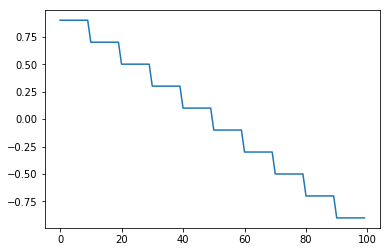

In [19]:
Draw(gradu, mesh, 'dx_firstfun')
plt.plot([gradu(mesh(x)) for x in linspace(0,1,100)])



Obviously the accuracy of this process can be improved for smooth functions by using higher order finite element spaces.
#### Vector-valued CoefficientFunctions


I don't think they make sense in 1-D


#### Expression tree

Internally, coefficient functions are implemented as an expression tree made from building blocks like x, y, sin, etc., and arithmetic operations.

E.g., the expression tree for myfunc = x*(1-x) looks like this:


In [21]:
print(myfunc)

coef binary operation '*', real
  coef coordinate x, real
  coef binary operation '-', real
    coef N5ngfem27ConstantCoefficientFunctionE, real
    coef coordinate x, real

